# Overview

The model works on a small portion of data divided into train and test datasets.

Each of these datasets consists of 198 images that are categorized into 33 classes.

Each image has a total of 784 pixels (28 x 28), and each pixel value is an integer between 0 and 255.

# Importing Data

In [1]:
import pandas as pd # For data manipulation
import numpy as np # To perform different operations
import matplotlib.pyplot as plt # For plotting and data visualization

#1. read csv files and create dataframes
train_df = pd.read_csv('input/train.csv',sep=',')
test_df = pd.read_csv('input/test.csv',sep=',')
#2. Create arrayes from the files and assign them to training testing variables
training = np.array(train_df, dtype = 'float32')
testing = np.array(test_df, dtype='float32')

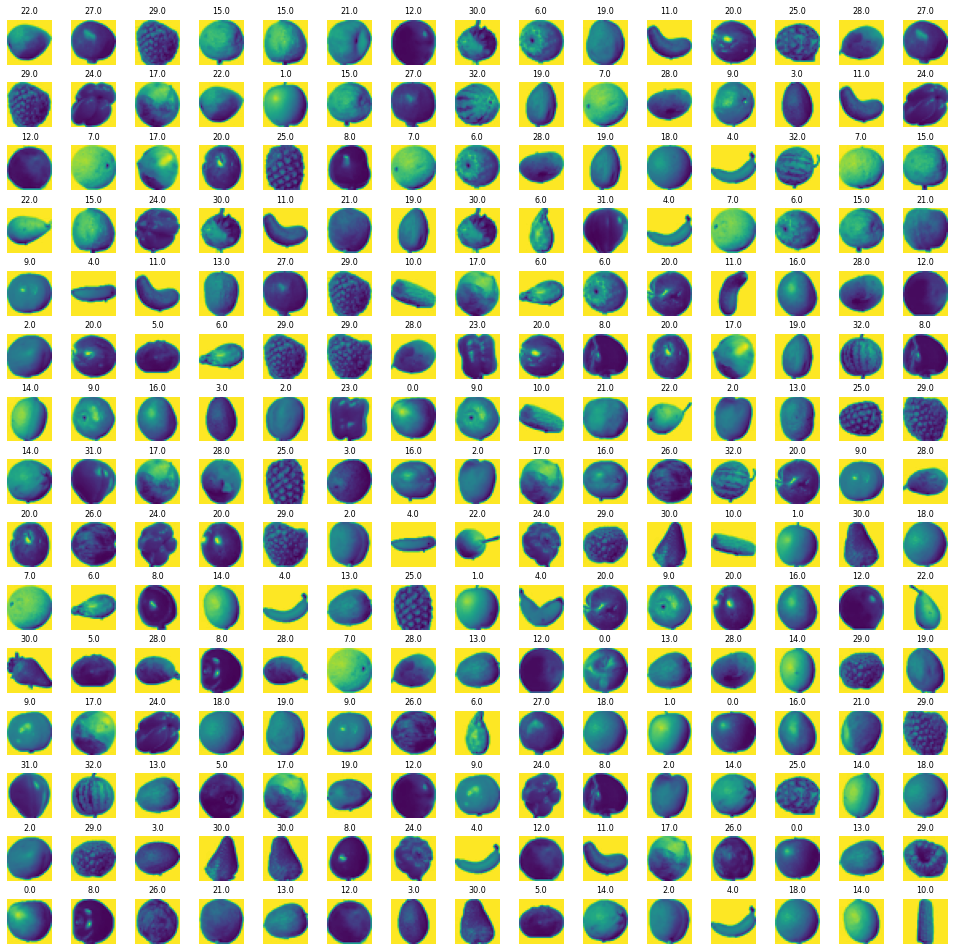

In [2]:
# Display some images for manual testing
# This code was copied from the boilerplate code for Lab 7 in DIT821
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off') # just to avoid showing the pixels around the images because we gonna present many images

plt.subplots_adjust(hspace=0.4)

# Model Training

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Split the data into pixels (X) and labels (y)
X_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:, 0]

X_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:, 0]

#Split the training set into 70% training and 30% validation
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.3, random_state = 12345)

#Train the model using RFC
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation

In [7]:
#Evaluate the model on validation set
clf.score(X_validate, y_validate)

0.8

# Prediction

In [21]:
prediction = clf.predict(X_test) # Returns a prediction for each example

In [31]:
# Create arrays from test dataframes for manual tesing purposes
X_test_arr = np.array(X_test, dtype = 'float32')
y_test_arr = np.array(y_test, dtype = 'float32')

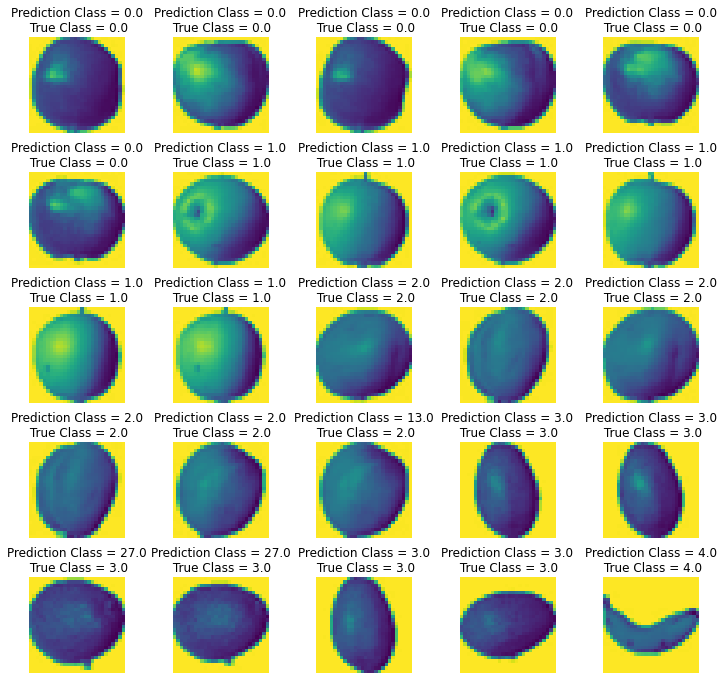

In [32]:
#Visualization of images along with their true and prectied class
# This code was copied from the boilerplate code for Lab 7 in DIT821
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test_arr[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(prediction[i], y_test_arr[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)